#Problem Statement:Airbnb Hotel Booking Analysis

The rise of online platforms has transformed the hospitality industry, with Airbnb leading this change by redefining how people find and book accommodations. Since its founding in 2008, Airbnb has grown into a global marketplace that connects hosts and guests, offering unique stays beyond traditional hotels. This study focuses on the New York City Airbnb dataset to uncover trends in pricing, availability, and guest experiences. By analyzing and visualizing the data, the research aims to provide valuable insights into how Airbnb operates within one of the world’s most dynamic urban lodging markets, helping stakeholders better understand the evolving short-term rental landscape.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [54]:
df=pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv',low_memory=False)

In [55]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [57]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [58]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [59]:
#drop duplicate words
df.drop_duplicates(inplace=True)

#drop house_rules and license columns with insufficient data
df.drop(['house_rules','license'],axis=1,inplace=True)

#Remove all dollar signs in the price and service fee columns
df['price']=df['price'].str.replace('$','')
df['service fee']=df['service fee'].str.replace('$','')

#Remove all commas in the price and service fee columns
df['price']=df['price'].str.replace(',','')
df['service fee']=df['service fee'].str.replace(',','')

#Rename the price and service fee columns to include a dollar sign
df.rename(columns={'price':'price_$','service fee':'service_fee_$'},inplace=True)

#Drop all records with missing values
df.dropna(inplace=True)

#change all mismatched data types to the appropriate once
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

#Correct the spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

#get rid of outliers in the 'availability 365' column data
df=df.drop(df[df['availability 365']>500].index)

/tmp/ipython-input-2407529759.py:26: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review']=pd.to_datetime(df['last review'])


In [60]:
df.duplicated().value_counts()

,count
False,83411


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

In [62]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


In [63]:
# what are different property types in the dataset
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


###What are the different property types in the dataset?

Text(0.5, 1.0, 'Property Types and their count in the Dataset')

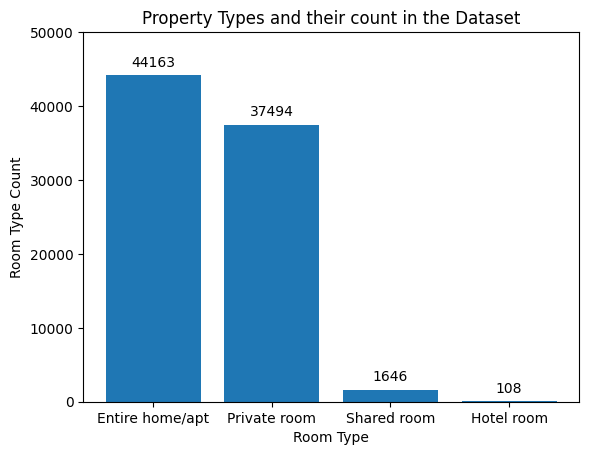

In [64]:
# room type count plotted on a barchart
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset')

In [65]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


###Which neighbourhood group has the highest number of listings?

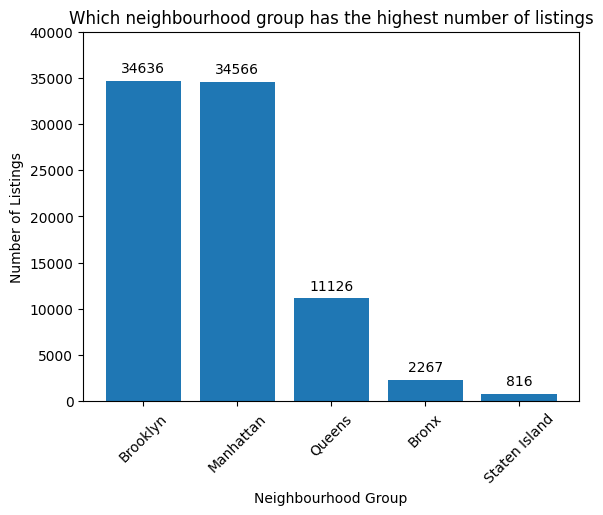

In [66]:
# room type count plotted on a barchart
hood_group_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which neighbourhood group has the highest number of listings');

###Which neighbourhoods group have the highest average prices for Airbnb listings?

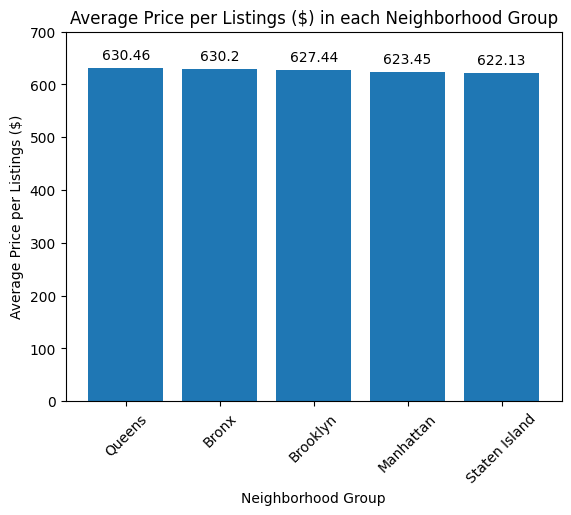

In [67]:
#which neighborhoods group have the highest average prices for Airbnb listings?
avg_price=df.groupby('neighbourhood group') ['price_$'].mean().sort_values (ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

###Is there a relationship between the construction year of property and price?

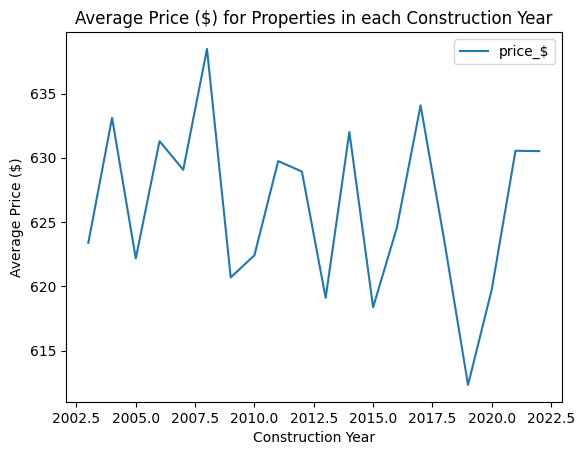

In [68]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year']) ['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

###Who are the top 10 hosts by calculated host listing count?

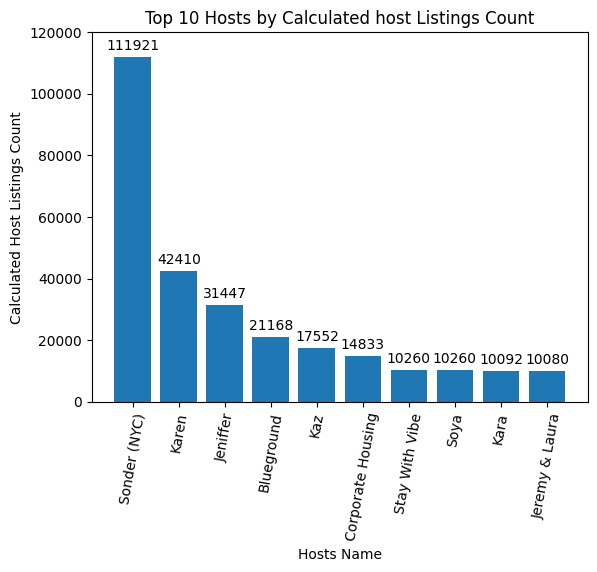

In [69]:
#who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name') ['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label (hosts_bar, label=hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

###Are hosts with verified identities more likely to receive positive reviews?

In [70]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


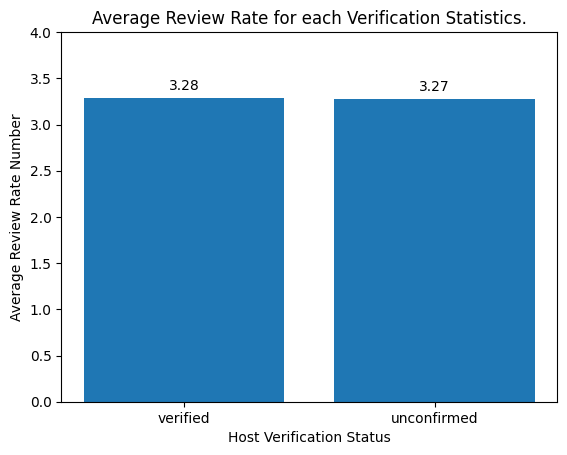

In [71]:
review_bar=plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels=round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

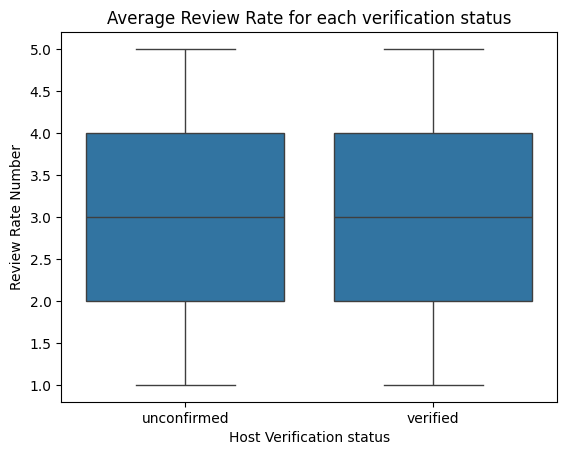

In [72]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color);
plt.xlabel('Host Verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each verification status');

###Is there a correlation between the price of a listing and its service fee?

In [73]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909074778258)

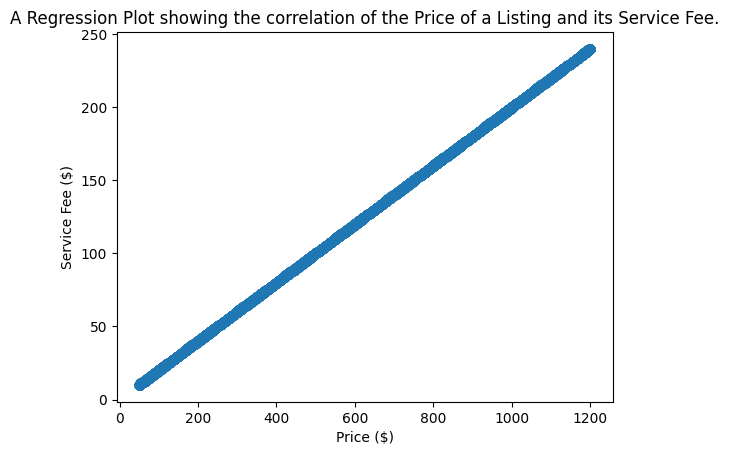

In [74]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the correlation of the Price of a Listing and its Service Fee.');

###What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [75]:
#what is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN=df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

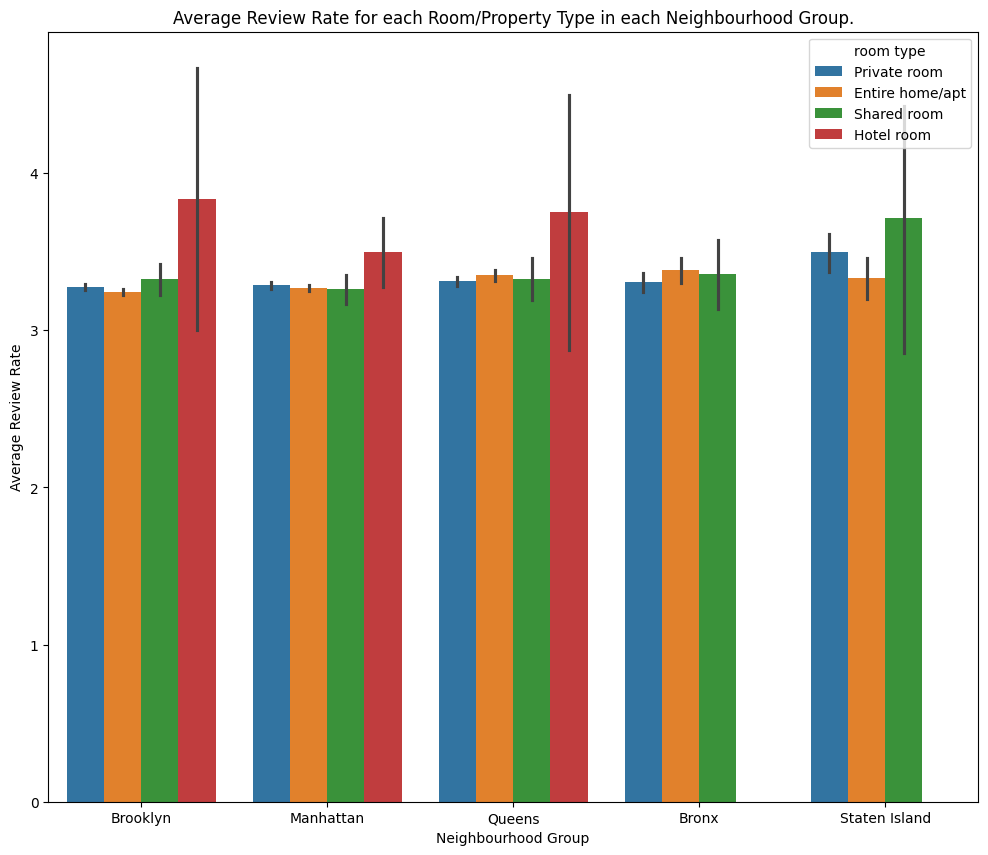

In [76]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

###Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

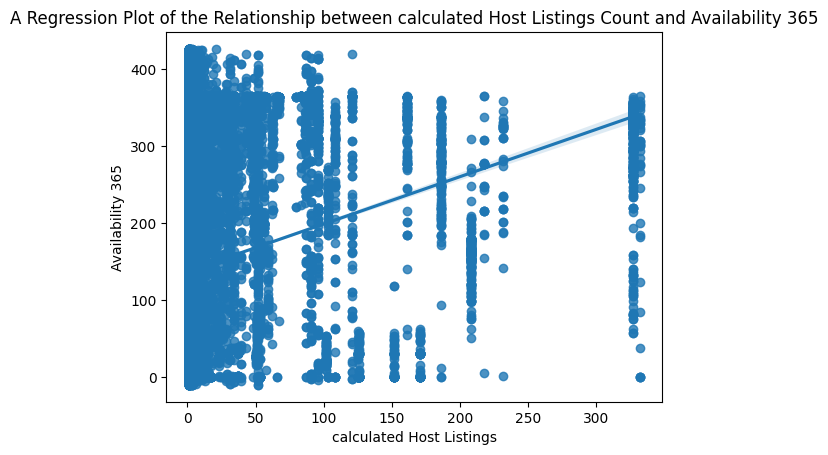

In [77]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df,x='calculated host listings count', y='availability 365');
plt.xlabel('calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between calculated Host Listings Count and Availability 365');

In [78]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359855273675869)